In [2]:
## %matplotlib inline

In [8]:
import numpy as np
import matplotlib.pyplot as plt
# Write your imports here

# Calculus Exercise
## Numerical Computation. Derivatives, integrals. Calculus in many dimensions

### Problem 1. Derivative and Slope at a Point
We'll warm up by visualizing how the derivative of a function relates to the slope of the function at a given point.

We can either calculate the derivative analytically (by hand) or use the numerical definition. So, let's see what a function and its derivative look like.

Write a Python function which plots a math function and its derivative.

In [9]:
def calculate_derivative_at_point(function, point, precision = 1e-7):
    """
    Calculates a numerical approximation to the derivative of the specified function
    at the given point
    """
    # I am not using formward precision like this: (function(point + precision) - function(point))/precision 
    # because I'm trying to minimise floating-point errors with precision - which can be seen in the plot when I display f'(x[-1])
    return (function(point + precision) - function(point - precision)) / (2 * precision)

def plot_derivative(function, derivative = None, min_x = -10, max_x = 10):
    """
    Plots the function and its derivative. 
    The `derivative` parameter is optional and can be provided as a separate function.
    If it's not provided, the derivative will be calculated automatically
    """
    # We're using vectorized functions to make our code simpler: this only hides the for-loop,
    # it doesn't provide any performance gain
    vectorized_function = np.vectorize(function)
    
    x = np.linspace(min_x, max_x, 1000)
    y = function(x)
    
    dy = []
    if derivative is None:
        dy = np.vectorize(calculate_derivative_at_point)(function, x)
    else:
        dy = np.vectorize(derivative)(x)
    
    plt.plot(x, y, color = "blue", label="f(x)")
    plt.plot(x, dy, color="green", label="f'(x)")
    plt.axvline(x[-1], color="grey", ls="dotted")
    plt.axhline(dy[-1], color="grey", ls="dashed", label=f"f'({x[-1]})={np.format_float_scientific(dy[-1], unique=True, trim='k')}")
    plt.axhline(function(x[-1]), color="grey", ls="dashdot", label=f"f({x[-1]})={np.format_float_scientific(function(x[-1]), unique=True, trim='k')}")
    plt.gca().legend()
    plt.xlabel("x-axis")
    plt.ylabel("f(x), f′(x)")
    plt.show()
    

Let's now test with out favourite function: $y = x^2$ whose derivative is $y' = 2x$. If you've worked correctly, both of the following plots should be the same.

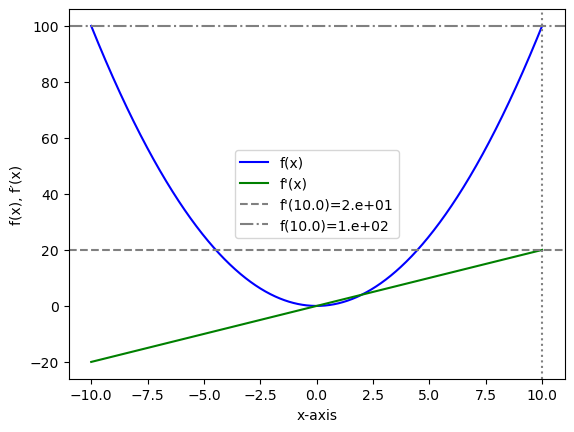

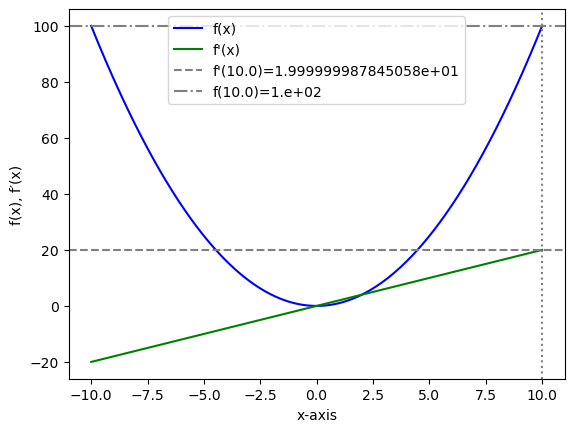

In [10]:
plot_derivative(lambda x: x ** 2, lambda x: 2 * x) # The derivative is calculated by hand
plot_derivative(lambda x: x ** 2) # The derivative is not pre-calculated, should be calculated inside the function

Let's try one more: $y = \sin(x)$, $y'= \cos(x)$.

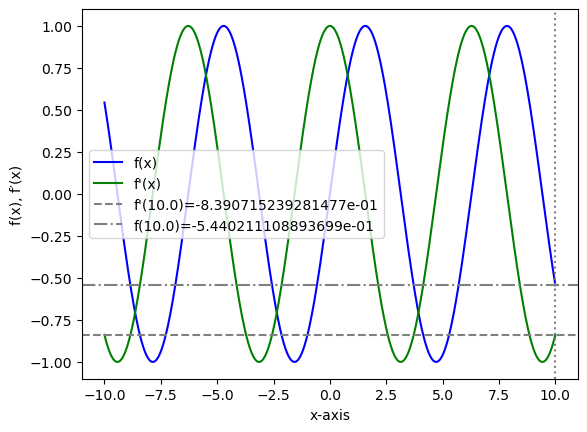

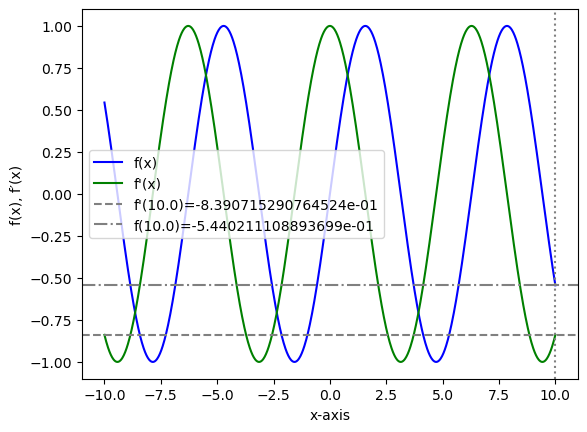

In [11]:
plot_derivative(np.sin)
plot_derivative(np.sin, np.cos)

These plots may look nice but they don't reflect the idea of **slope at a point** very well. Now that we're sure our functions are working, let's actually calculate the derivative at **one point** and see that it is, indeed, equal to the slope of the function at that point.

#### How to plot the tangent line?
We need to find the line equation first. 

We're given the derivative, which is equal to the slope of the line. In the line equation $y = ax + b$, the slope is $a$. We now have to find $b$. We're given a point $P(x_P; y_P)$ through which the line passes. Substitute $x_P$ and $y_P$:
$$ y_P = ax_P + b $$

$$ b = y_P - ax_P $$

Now that we have $a$ and $b$, we can plot the line given by $y = ax + b$. The parameter $b$ is sometimes called "y-intercept" (or "intercept").

Now we can copy the code from the previous function. This time, however, we won't plot the entire range, only one value of the derivative. We'll also show the point where we're calculating.

In [9]:
def plot_derivative_at_point(function, point, derivative = None, min_x = -10, max_x = 10):
    """
    Plots the function in the range [x_min; x_max]. Computes the tangent line to the function
    at the given point and also plots it
    """
    vectorized_function = np.vectorize(function)
    
    x = np.linspace(min_x, max_x, 1000)
    y = vectorized_function(x)
    
    slope = 0 # Slope of the tangent line
    if derivative is None:
        slope = calculate_derivative_at_point(function, point)
    else:
        slope = derivative(point)
    
    intercept = function(point) - slope * point
    tangent_line_x = np.linspace(point - 2, point + 2, 10)
    tangent_line_y = slope * tangent_line_x + intercept
    plt.plot(x, y)
    plt.plot(tangent_line_x, tangent_line_y)
    plt.show()

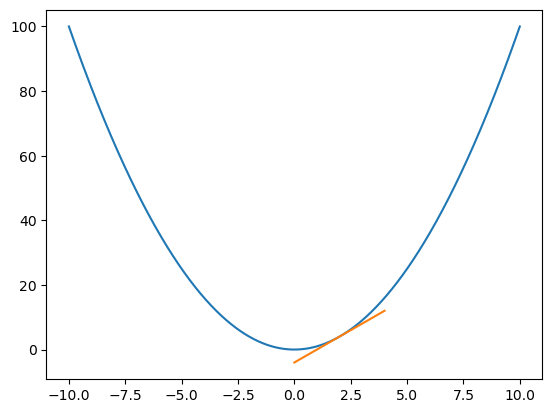

In [10]:
plot_derivative_at_point(lambda x: x ** 2, 2)

Looks like it! Let's zoom in to confirm:

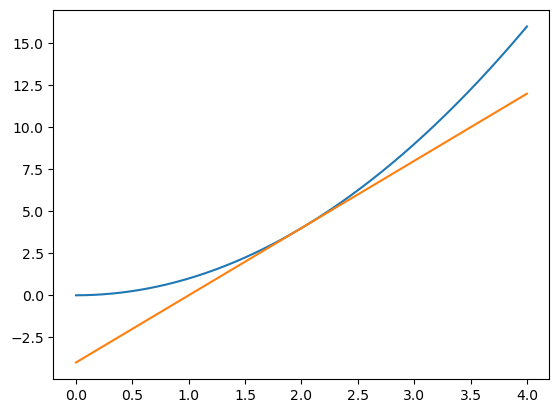

In [11]:
plot_derivative_at_point(lambda x: x ** 2, 2, min_x = 0, max_x = 4)

Let's also plot several tangents to the same function. Note that this will create many graphs by default.

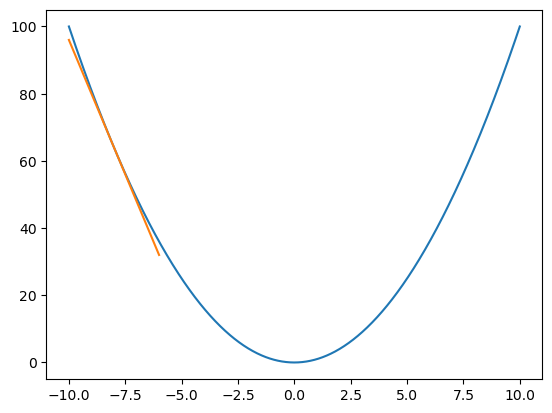

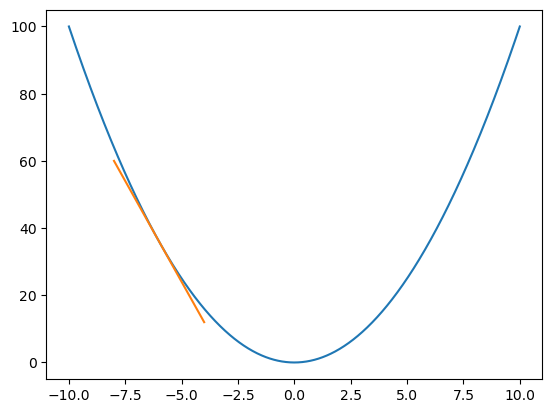

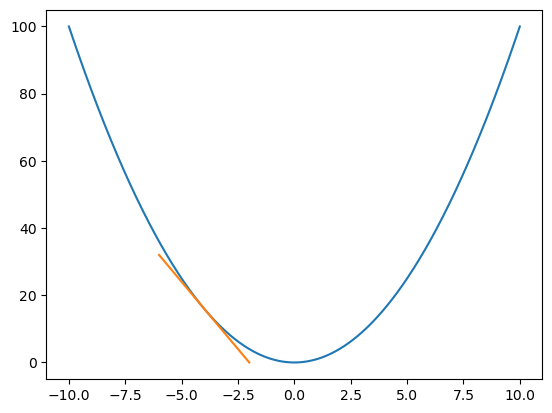

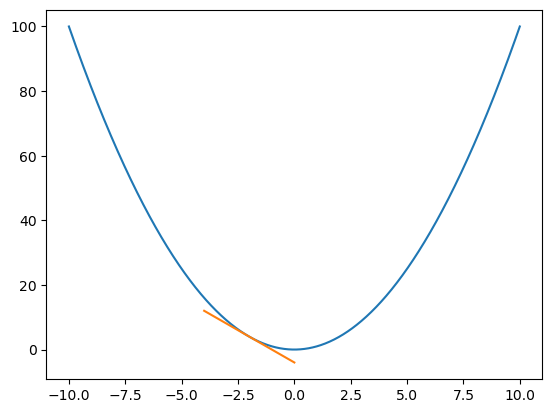

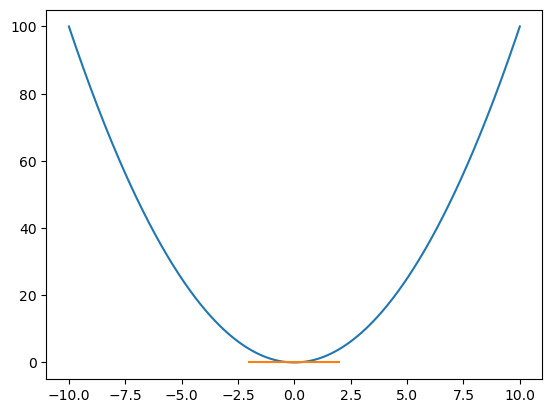

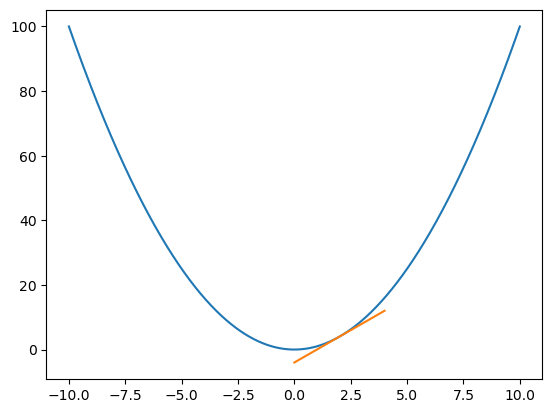

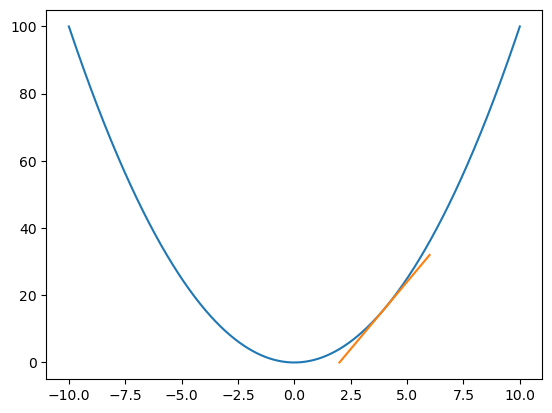

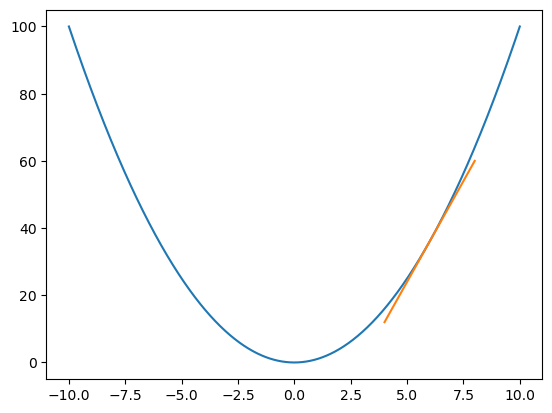

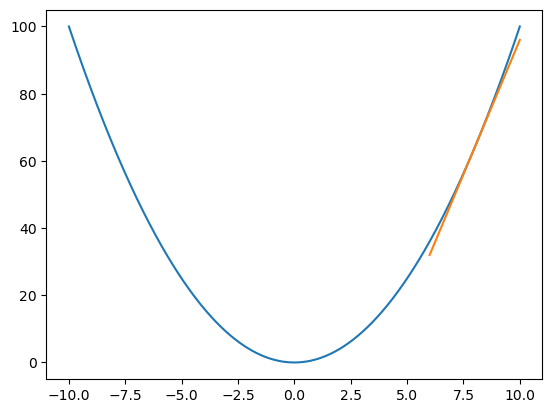

In [16]:
for x in np.arange(-8, 10, 2):
    plot_derivative_at_point(lambda x: x ** 2, x)

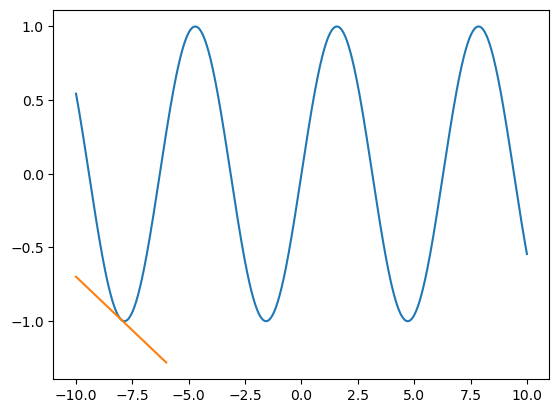

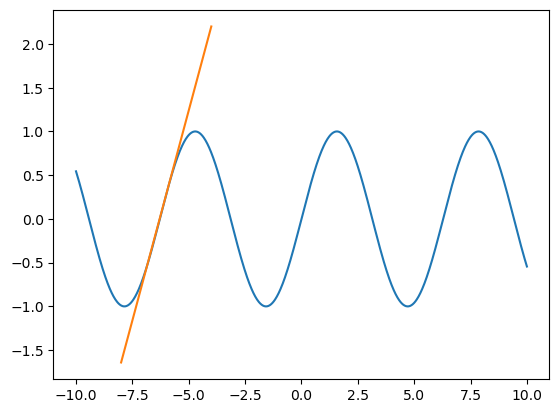

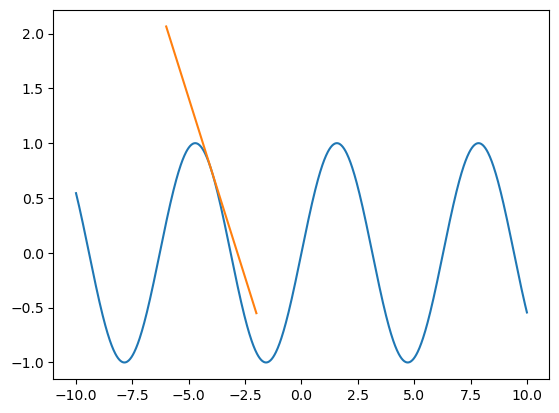

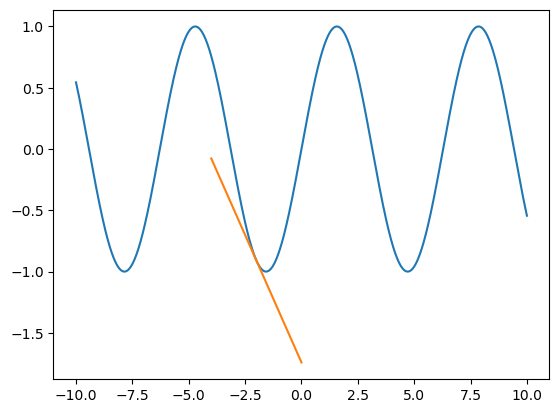

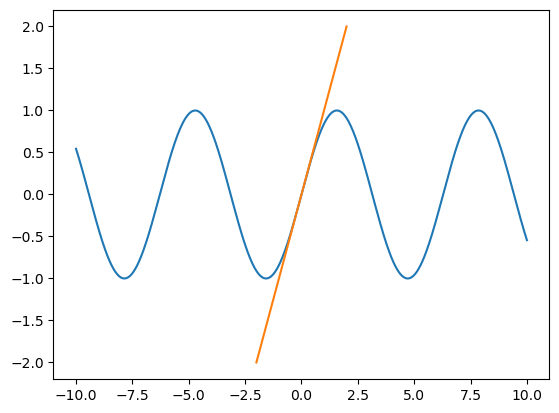

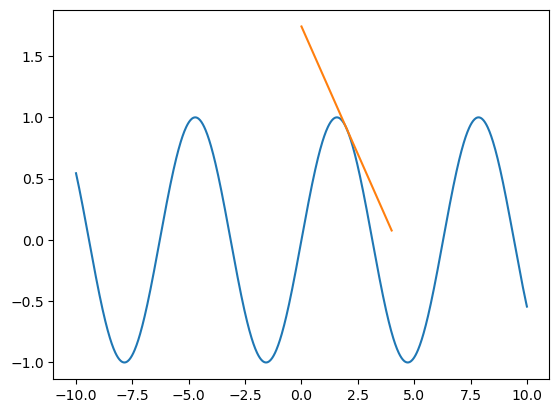

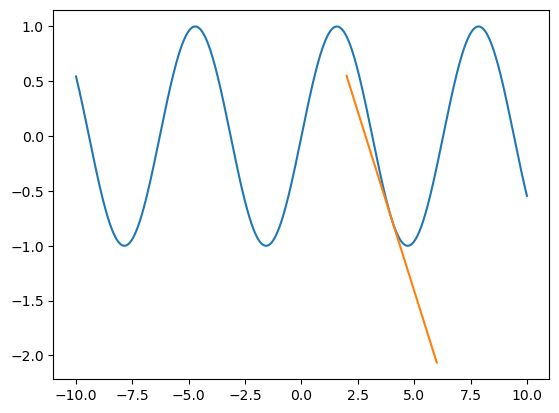

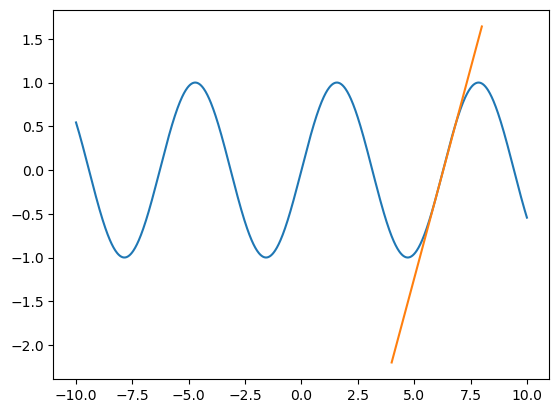

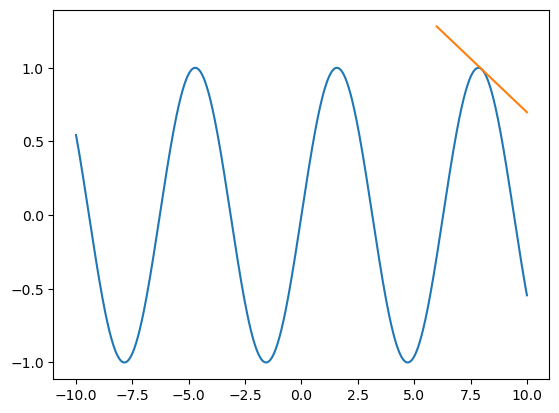

In [13]:
for x in np.arange(-8, 10, 2):
    plot_derivative_at_point(np.sin, x)

Now we have a visual proof that the derivative of a function at a given point is equal to the slope of the tangent line to the function.

### Bonus - Graphical proof of fundamental theorem of calculus

Above we plotted the derivative of function $f(x)$. What we will inverse the derivative in order to get our original function. As you can imagine we will do that by manually integrating/finding the antiderivative (without making use of cumulative_trapezoid from scipy.integrate).

In [27]:
def derivative_and_integral(function, precision = 1e-7):

    x = np.linspace(-4, 10, 1000)
    y = function(x)
    
    dy = (function(x + precision) - function(x))/precision # derivative of f(x)
    
    dx = x[1] - x[0]
    
    # Method 1 of manually computing antiderivative starting from 0 and only in the end adding to the function + C(constant).
    integral_dy = [0]  # Start at 0 
    total = 0
    for i in range(1, len(dy)):
        total += (dy[i - 1] * dx)  # area of current rectangle
        integral_dy.append(total)

    integral_dy = np.array(integral_dy) + y[0]

    # Method 2 of manually calculating antiderivative starting with y[0] to account for the lost "+ C" term
    # integral_dy_1 = [y[0]]  # Start at C=y[0]. This of course can be done if we know the original function, if not we can tweek it until the graphs align.
    # total = integral_dy_1[0]
    # for i in range(1, len(dy)):
    #     total += (dy[i - 1] * dx)  # area of current rectangle
    #     integral_dy_1.append(total)
        
    # integral_dy_1 = np.array(integral_dy_1)
    
    plt.plot(x, y, color = "blue", label="f(x)")
    plt.plot(x, integral_dy, color="orange", label=r"$\int f'(x)\,dx$")
    # plt.plot(x, integral_dy_1, color="magenta", label=r"$\int f'(x)\,dx$")
    plt.plot(x, dy, color="green", label="f'(x)")
    plt.axvline(x[-1], color="grey", ls="dotted")
    plt.axhline(dy[-1], color="grey", ls="dashed", label=f"f'({x[-1]})={np.format_float_scientific(dy[-1], unique=True, trim='k')}")
    plt.axhline(function(x[-1]), color="grey", ls="dashdot", label=f"f({x[-1]})={np.format_float_scientific(function(x[-1]), unique=True, trim='k')}")
    plt.gca().legend()
    
    plt.xlabel("x-axis")
    plt.ylabel("f(x), f′(x)")
    
    plt.show()


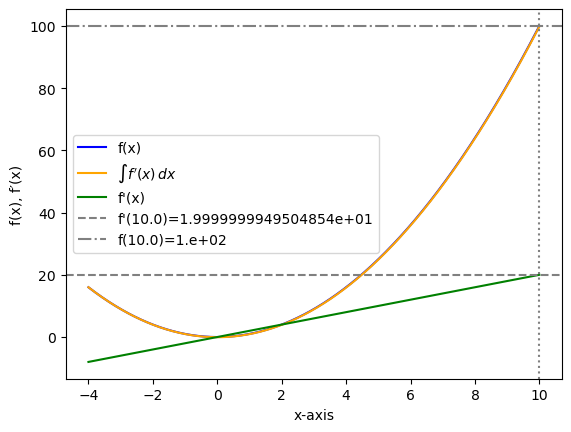

In [28]:
derivative_and_integral(lambda x: x ** 2)

We see that $f(x) = \int f'(x)\,dx$. Now let's try another example but this time our original function will halso include a constant.

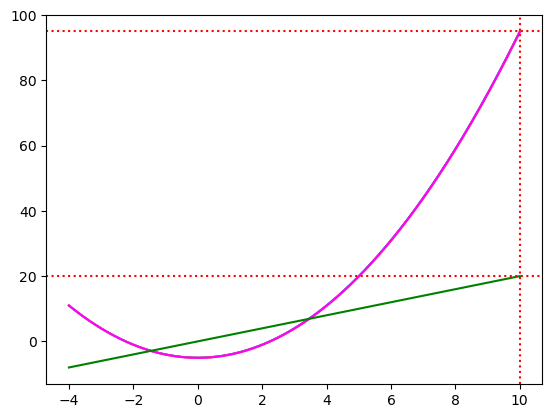

In [24]:
derivative_and_integral(lambda x: x ** 2 - 5)

Let's try with another interesting function. I think we are convinced.

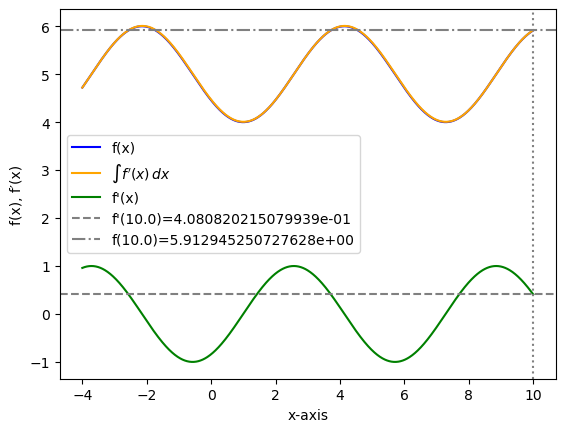

In [36]:
derivative_and_integral(lambda x: np.sin(x+10) + 5)